# **Import section**


In [38]:
# Install required packages
!pip install -U numpy catboost --quiet
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\HUAWEI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\HUAWEI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

# **Load data**


In [40]:
# Load dataset
df = pd.read_csv("education_career_successSUP.csv")

# Display the first 5 rows of the dataframe
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Career_Success_Score,STEM_Score,Business_Orientation
0,S00001,24,1,3.58,1052,291,3.96,Arts,3,7,...,5,27200,4,5,Entry,7,No,NaN,650.800000,185.0
1,S00002,21,2,2.52,1211,112,3.63,Law,4,7,...,4,25000,1,1,Mid,7,No,NaN,704.400000,140.0
2,S00003,28,0,3.42,1193,715,2.63,Medicine,4,8,...,0,42400,9,3,Entry,7,No,NaN,647.200000,125.0
3,S00004,25,1,2.43,1563,170,2.81,Computer Science,3,12,...,1,57400,7,5,Mid,5,No,NaN,908.919948,140.0
4,S00005,22,1,2.08,1065,599,2.48,Engineering,4,10,...,4,47600,9,5,Entry,2,No,NaN,674.317427,260.0


In [41]:
#To get the Number of class
print(df['Field_of_Study'].unique())

print("Number of class :", df['Field_of_Study'].nunique())

['Arts' 'Law' 'Medicine' 'Computer Science' 'Engineering' 'Business'
 'Mathematics']
Number of class : 7


# **EDA(Exploratory Data Analysis)**

---

 analyzing and visualizing the data to understand its structure, patterns, and relationships.



**Analyze**

---

 the data, as this provides the foundation for any visualization,solid understanding of the data



1.   **Data Inspection**




In [42]:
# print number of row and colume of data
print("Shape of the Data:")
df.shape

Shape of the Data:


(5000, 23)

In [43]:
# print dataType of each feature
print("The data type of feature :\n")
df.dtypes

The data type of feature :



Student_ID                object
Age                        int64
Gender                     int64
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary            int64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
Career_Success_Score     float64
STEM_Score               float64
Business_Orientation     float64
dtype: object




2.   **Statistical Summary**



In [44]:
# Summary statistics of the dataset
summary_statistics = df.describe(include='all')
summary_statistics

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Career_Success_Score,STEM_Score,Business_Orientation
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000,0.0,5000.000000,5000.000000
unique,5000,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,2,NaN,NaN,NaN
top,S05000,NaN,NaN,NaN,NaN,NaN,NaN,Arts,NaN,NaN,...,NaN,NaN,NaN,NaN,Entry,NaN,No,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,749,NaN,NaN,...,NaN,NaN,NaN,NaN,2463,NaN,3992,NaN,NaN,NaN
mean,NaN,23.442200,0.568400,2.996978,1272.408000,504.335600,3.020028,NaN,1.982200,5.523600,...,2.488800,50563.540000,5.578000,3.015800,NaN,5.482400,NaN,NaN,660.590498,165.672651
std,NaN,3.473712,0.567614,0.575673,205.380576,291.060011,0.576047,NaN,1.408219,3.314218,...,1.711859,14494.958207,2.871997,1.417446,NaN,2.883427,NaN,NaN,105.282295,62.479961
min,NaN,18.000000,0.000000,2.000000,900.000000,1.000000,2.000000,NaN,0.000000,0.000000,...,0.000000,25000.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,370.400000,15.000000
25%,NaN,20.000000,0.000000,2.500000,1099.000000,256.000000,2.520000,NaN,1.000000,3.000000,...,1.000000,40200.000000,3.000000,2.000000,NaN,3.000000,NaN,NaN,582.400000,120.000000
50%,NaN,23.000000,1.000000,2.990000,1273.000000,501.500000,3.030000,NaN,2.000000,6.000000,...,2.000000,50300.000000,6.000000,3.000000,NaN,6.000000,NaN,NaN,662.000000,165.000000
75%,NaN,26.000000,1.000000,3.500000,1451.000000,759.000000,3.510000,NaN,3.000000,8.000000,...,4.000000,60500.000000,8.000000,4.000000,NaN,8.000000,NaN,NaN,736.400000,210.000000


In [45]:
# Summary statistics of numerical features
print("Data Description:\n")
df.describe()

Data Description:



,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance,Career_Success_Score,STEM_Score,Business_Orientation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0,5000.000000,5000.000000
mean,23.442200,0.568400,2.996978,1272.408000,504.335600,3.020028,1.982200,5.523600,3.689800,7.279400,6.54460,2.488800,50563.540000,5.578000,3.015800,5.482400,NaN,660.590498,165.672651
std,3.473712,0.567614,0.575673,205.380576,291.060011,0.576047,1.408219,3.314218,2.236644,3.556609,3.31949,1.711859,14494.958207,2.871997,1.417446,2.883427,NaN,105.282295,62.479961
min,18.000000,0.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,25000.000000,1.000000,1.000000,1.000000,NaN,370.400000,15.000000
25%,20.000000,0.000000,2.500000,1099.000000,256.000000,2.520000,1.000000,3.000000,2.000000,5.000000,4.00000,1.000000,40200.000000,3.000000,2.000000,3.000000,NaN,582.400000,120.000000
50%,23.000000,1.000000,2.990000,1273.000000,501.500000,3.030000,2.000000,6.000000,4.000000,7.000000,7.00000,2.000000,50300.000000,6.000000,3.000000,6.000000,NaN,662.000000,165.000000
75%,26.000000,1.000000,3.500000,1451.000000,759.000000,3.510000,3.000000,8.000000,5.000000,10.000000,9.00000,4.000000,60500.000000,8.000000,4.000000,8.000000,NaN,736.400000,210.000000
max,29.000000,2.000000,4.000000,1696.000000,1000.000000,4.000000,4.000000,14.000000,9.000000,16.000000,15.00000,5.000000,101000.000000,10.000000,5.000000,10.000000,NaN,956.105947,354.453947


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   int64  
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   int64  
 15  Care



3.   **Data Cleaning**

---

dataset is confirmed to have no null values, you can skip any steps involving handling missing data



In [47]:
# Checking for missing values
missing_values=df.isnull().sum()
missing_values

Student_ID                  0
Age                         0
Gender                      0
High_School_GPA             0
SAT_Score                   0
University_Ranking          0
University_GPA              0
Field_of_Study              0
Internships_Completed       0
Projects_Completed          0
Certifications              0
Soft_Skills_Score           0
Networking_Score            0
Job_Offers                  0
Starting_Salary             0
Career_Satisfaction         0
Years_to_Promotion          0
Current_Job_Level           0
Work_Life_Balance           0
Entrepreneurship            0
Career_Success_Score     5000
STEM_Score                  0
Business_Orientation        0
dtype: int64

find duplicate rows in your DataFrame and If duplicates are unnecessary, drop them

In [48]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates.head()
# Remove duplicate rows if necessary
df = df.drop_duplicates()

Number of duplicate rows: 0


**Visualizing**

---

 is typically done after analysis to help spot trends, distributions, and relationships more clearly

**Histograms.**
* Visualize the distribution of numeric features using histograms.

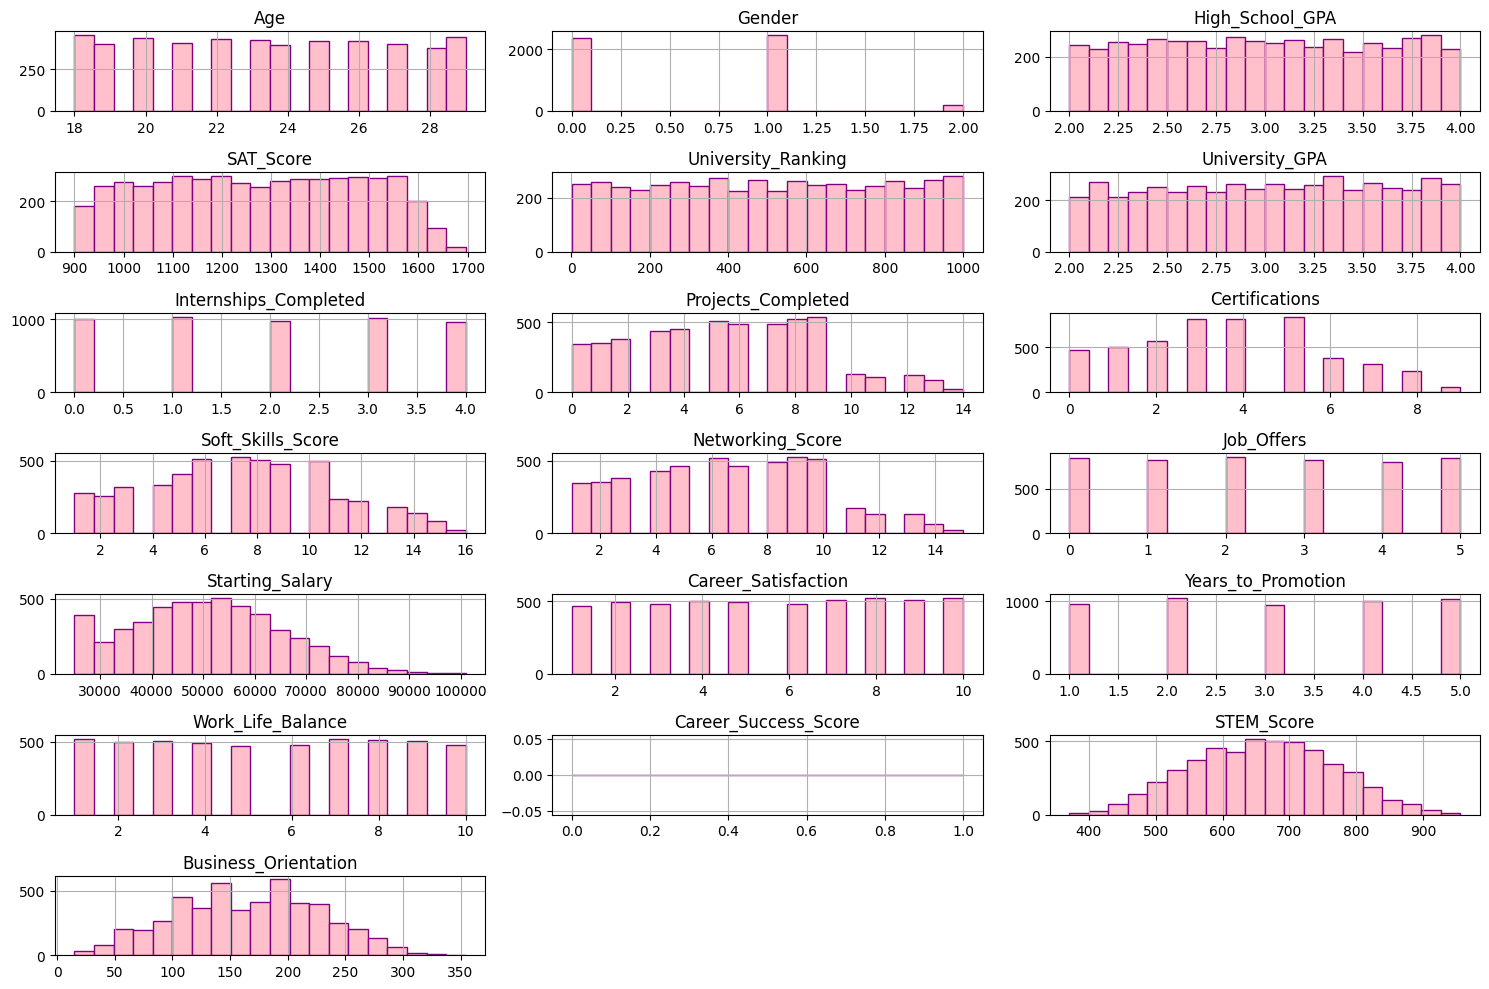

In [49]:
# Plot histograms for all numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(bins=20, figsize=(15, 10),color='pink', edgecolor='purple', layout=(len(numerical_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()

**Correlation Matrix**
* Visualize correlation between numerical features.

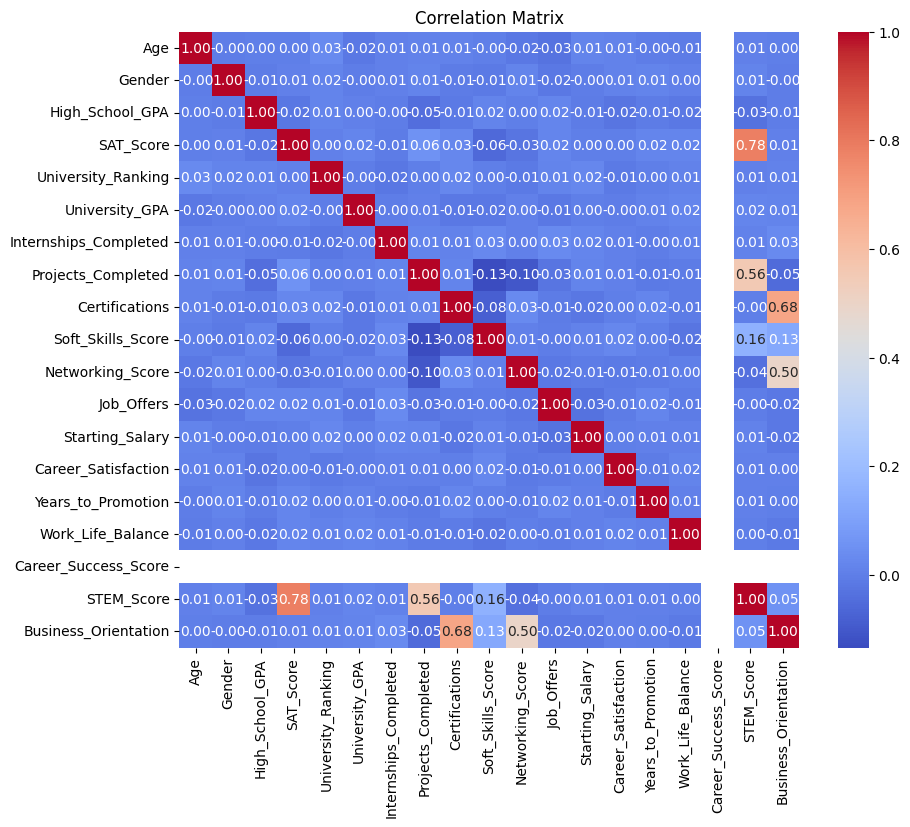

In [50]:
# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Class Distribution**
* Visualize the distribution of the number of samples in each class.

Distribution of Samples per Class:

Field_of_Study
Arts                749
Mathematics         745
Law                 727
Business            719
Engineering         701
Medicine            689
Computer Science    670
Name: count, dtype: int64


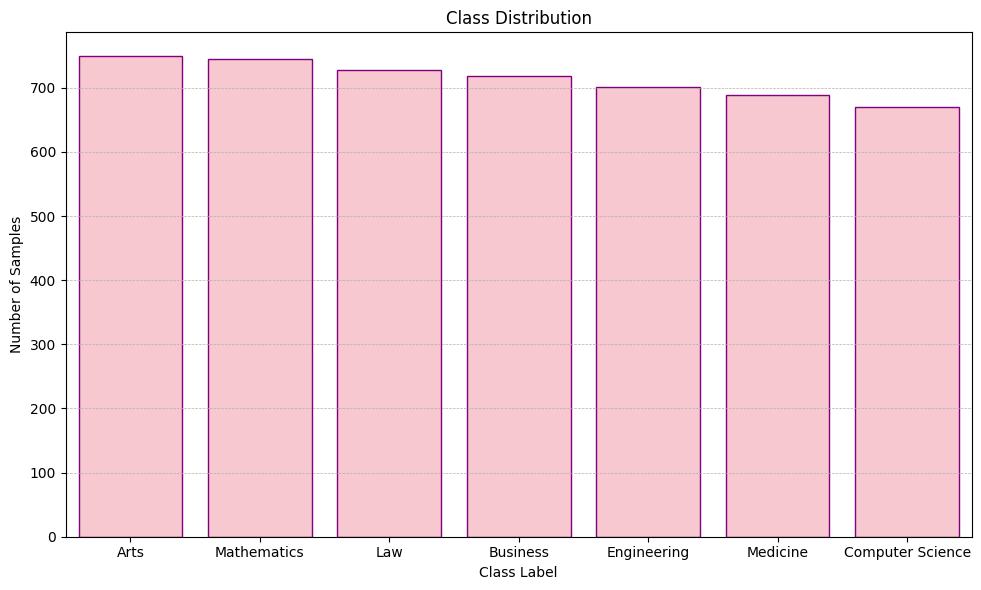

In [51]:
# Count the number of samples in each class
class_distribution = df['Field_of_Study'].value_counts()

# Display the distribution
print("Distribution of Samples per Class:\n")
print(class_distribution)

# Plot the distribution as a bar chart with pink color
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, color='pink', edgecolor='purple')
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **Data Preprocessing**
handling missing values, encoding categorical data, and creating new features.

1. **Handle Missing Values**
- Fill or remove missing values to prepare the dataset for modeling.

In [53]:
# Fill missing values
df['Career_Success_Score'].fillna(df['Career_Success_Score'].median(), inplace=True)

C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20288\4190941658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Career_Success_Score'].fillna(df['Career_Success_Score'].median(), inplace=True)


In [55]:
# Encode Field_of_Study early so we can use it in adjustments
target_encoder = LabelEncoder()
df["Field_of_Study"] = target_encoder.fit_transform(df["Field_of_Study"])

2.**Feature Selection using Catboost**


Here, we use Catboost to analyze feature importance. After training the model, we visualize the contribution of each feature to the final prediction.


In [56]:
# Drop Student_ID because it's an identifier, not a feature
df = df.drop('Student_ID', axis=1)

# Separate features and target
X = df.drop('Field_of_Study', axis=1)
y = df['Field_of_Study']

# Specify categorical columns for encoding
categorical_cols = ['Current_Job_Level', 'Entrepreneurship']

# Split data into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize and train the CatBoost classifier
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.2,
    depth=6,
    random_seed=42,
    verbose=0
)

# Fit the model using sample weights for balanced classes
cat_model.fit(
    X_train_cat,
    y_train_cat,
    cat_features=categorical_cols,
    sample_weight=compute_sample_weight(class_weight='balanced', y=y_train_cat)
)


 Top 10 Important Features (CatBoost):
                 Feature  Importance
8         Certifications   29.810068
20  Business_Orientation   17.060458
9      Soft_Skills_Score   14.180178
10      Networking_Score   14.024491
7     Projects_Completed    9.866174
19            STEM_Score    3.664585
3              SAT_Score    3.342683
2        High_School_GPA    1.208780
16     Work_Life_Balance    0.965407
11            Job_Offers    0.788741


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_20288\1741533333.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(top_n), x='Importance', y='Feature', palette='coolwarm')


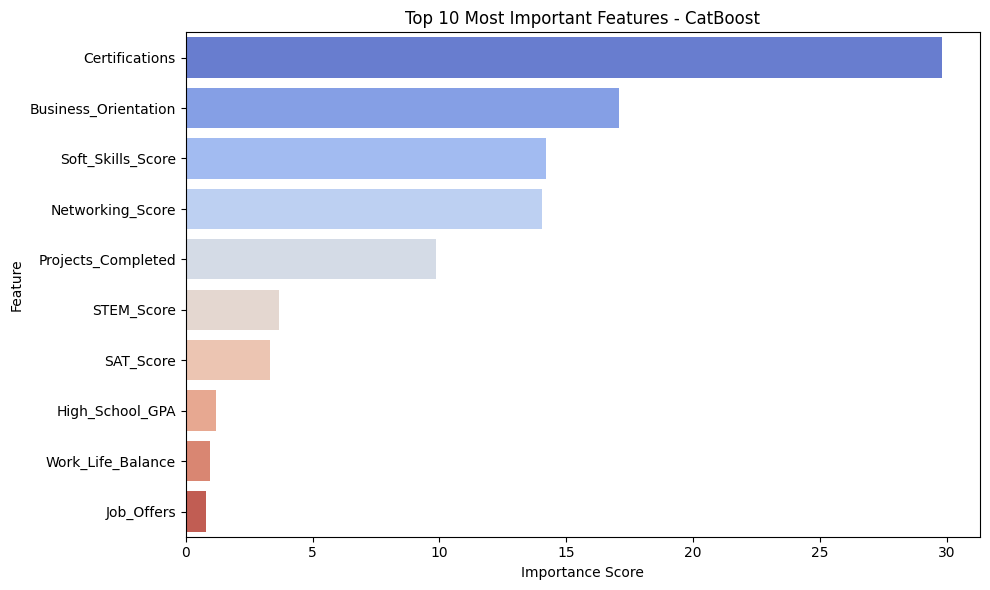

In [58]:
# Get top 10 most important features from CatBoost
importances = cat_model.get_feature_importance()
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 10
top_features = feature_importance_df.head(top_n)['Feature'].tolist()

print(f"\n Top {top_n} Important Features (CatBoost):")
print(feature_importance_df.head(top_n))

# Plot top feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(top_n), x='Importance', y='Feature', palette='coolwarm')
plt.title(f'Top {top_n} Most Important Features - CatBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Selected Features Justification**


The dataset was filtered to include the top 9 most relevant features.
These features were selected because they reflect key attributes that can be easily gathered through straightforward questions directed at high school students.
less accessible features were intentionally excluded to ensure practicality and ease of data collection for the intended audience.


In [65]:

X_top = df[['Certifications', 'Soft_Skills_Score', 'Projects_Completed', 'Networking_Score', 'Work_Life_Balance', 'Business_Orientation', 'SAT_Score','STEM_Score','High_School_GPA']]
y_top = df["Field_of_Study"]

# **Model Choosing**

In [81]:
# Split the new dataset into training and testing sets with stratified sampling
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y_top, test_size=0.2, random_state=42, stratify=y_top)

In [82]:
# Model Choosing – Compare multiple classifiers

# 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_top, y_train_top)
y_pred_knn_train = knn.predict(X_train_top)
y_pred_knn_test = knn.predict(X_test_top)

# 2. Support Vector Machine (SVM) with default parameters
svm = SVC()
svm.fit(X_train_top, y_train_top)
y_pred_svm_train = svm.predict(X_train_top)
y_pred_svm_test = svm.predict(X_test_top)

# 3. CatBoost Classifier
cat_model_choose =CatBoostClassifier(
    iterations=100,
    learning_rate=0.2,
    depth=6,
    random_seed=42,
    verbose=0
)
cat_model_choose.fit(
    X_train_top,
    y_train_top,
    sample_weight=compute_sample_weight(class_weight='balanced', y=y_train_top)
)
y_pred_cat_train = cat_model_choose.predict(X_train_top)
y_pred_cat_test = cat_model_choose.predict(X_test_top)

# Accuracy Scores
print(" Accuracy Scores:")
print(f"KNN - Train: {accuracy_score(y_train_top, y_pred_knn_train):.2f} | Test: {accuracy_score(y_test_top, y_pred_knn_test):.2f}")
print(f"SVM - Train: {accuracy_score(y_train_top, y_pred_svm_train):.2f} | Test: {accuracy_score(y_test_top, y_pred_svm_test):.2f}")
print(f"CatBoost - Train: {accuracy_score(y_train_top, y_pred_cat_train):.2f} | Test: {accuracy_score(y_test_top, y_pred_cat_test):.2f}")

# Classification Reports
print("\n KNN Classification Report (Train):\n", classification_report(y_train_top, y_pred_knn_train))
print("KNN Classification Report (Test):\n", classification_report(y_test_top, y_pred_knn_test))

print("\n SVM Classification Report (Train):\n", classification_report(y_train_top, y_pred_svm_train))
print("SVM Classification Report (Test):\n", classification_report(y_test_top, y_pred_svm_test))

print("\n CatBoost Classification Report (Train):\n", classification_report(y_train_top, y_pred_cat_train))
print("CatBoost Classification Report (Test):\n", classification_report(y_test_top, y_pred_cat_test))


 Accuracy Scores:
KNN - Train: 0.51 | Test: 0.18
SVM - Train: 0.21 | Test: 0.20
CatBoost - Train: 0.93 | Test: 0.78

 KNN Classification Report (Train):
               precision    recall  f1-score   support

           0       0.42      0.87      0.57       599
           1       0.49      0.74      0.59       575
           2       0.48      0.55      0.51       536
           3       0.53      0.43      0.48       561
           4       0.63      0.36      0.46       582
           5       0.72      0.33      0.45       596
           6       0.68      0.27      0.38       551

    accuracy                           0.51      4000
   macro avg       0.56      0.51      0.49      4000
weighted avg       0.56      0.51      0.49      4000

KNN Classification Report (Test):
               precision    recall  f1-score   support

           0       0.15      0.35      0.21       150
           1       0.22      0.31      0.26       144
           2       0.19      0.19      0.19       1

C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HUAWEI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

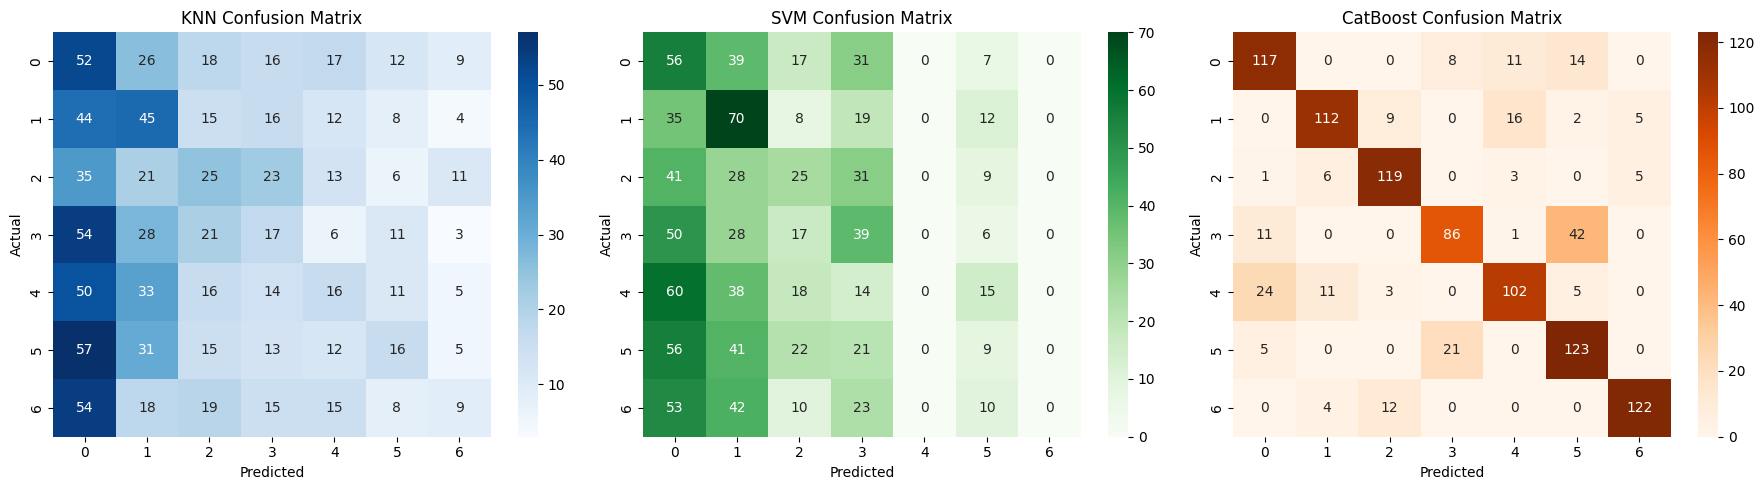

In [83]:
# Plot confusion matrices for all models
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test_top, y_pred_knn_test), annot=True, fmt="d", ax=ax[0], cmap="Blues")
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_top, y_pred_svm_test), annot=True, fmt="d", ax=ax[1], cmap="Greens")
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_top, y_pred_cat_test), annot=True, fmt="d", ax=ax[2], cmap="Oranges")
ax[2].set_title("CatBoost Confusion Matrix")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [84]:
# Choose the CatBoost model for further tuning
baseline_model = cat_model_choose

# **CatBoost Model Implementation**

Train Accuracy: 0.93
Test Accuracy: 0.78

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       599
           1       0.95      0.95      0.95       575
           2       0.95      0.96      0.96       536
           3       0.91      0.88      0.90       561
           4       0.92      0.90      0.91       582
           5       0.87      0.95      0.91       596
           6       0.98      0.98      0.98       551

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       150
           1       0.84      0.78      0.81       144
           2       0.83      0.89      0.86       134
           3       0.75      0.61      0.67       140
           4       0.77    

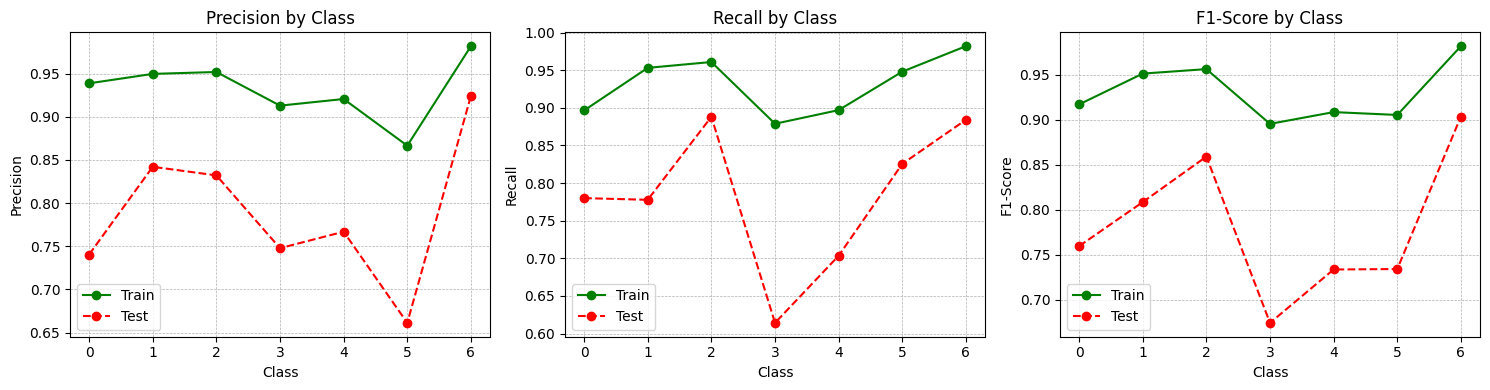

In [85]:

# --- Generate predictions from baseline model ---
y_pred_train_base = baseline_model.predict(X_train_top)
y_pred_test_base = baseline_model.predict(X_test_top)

# --- Print accuracy scores ---
train_accuracy = accuracy_score(y_train_top, y_pred_train_base)
test_accuracy = accuracy_score(y_test_top, y_pred_test_base)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# --- Print classification reports (summary matrices) ---
print("\nClassification Report (Train):\n", classification_report(y_train_top, y_pred_train_base))
print("Classification Report (Test):\n", classification_report(y_test_top, y_pred_test_base))

# --- Convert reports to dictionaries for plotting ---
train_report = classification_report(y_train_top, y_pred_train_base, output_dict=True)
test_report = classification_report(y_test_top, y_pred_test_base, output_dict=True)

# --- Extract class labels as strings (e.g., '0', '1', ...) ---
classes = [label for label in train_report if label.isdigit()]

# --- Define the metrics to plot ---
metric_labels = ['Precision', 'Recall', 'F1-Score']
train_metrics = {m: [train_report[cls][m.lower()] for cls in classes] for m in metric_labels}
test_metrics = {m: [test_report[cls][m.lower()] for cls in classes] for m in metric_labels}

# --- Plot metrics side by side ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for i, metric in enumerate(metric_labels):
    axs[i].plot(classes, train_metrics[metric], marker='o', linestyle='-', label='Train', color='green')
    axs[i].plot(classes, test_metrics[metric], marker='o', linestyle='--', label='Test', color='red')
    axs[i].set_title(f'{metric} by Class', fontsize=12)
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel(metric)
    axs[i].grid(True, linestyle='--', linewidth=0.5)
    axs[i].set_xticks(range(len(classes)))
    axs[i].set_xticklabels(classes)
    axs[i].legend()

plt.tight_layout()
plt.show()


# **Hyperparameter tuning**

In [86]:
# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost model
cat_model_grid = CatBoostClassifier(
    random_seed=42,
    verbose=0
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model_grid,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Run grid search
grid_search.fit(
    X_train_top,
    y_train_top,
    sample_weight=compute_sample_weight(class_weight='balanced', y=y_train_top)
)

# Print only the best parameters
print("Best Parameters:", grid_search.best_params_)

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate on training set
y_train_pred = best_model.predict(X_train_top)
train_accuracy = accuracy_score(y_train_top, y_train_pred)
print("Train Accuracy (Best Model):", train_accuracy)

# Evaluate on test set
y_pred_best = best_model.predict(X_test_top)
test_accuracy = accuracy_score(y_test_top, y_pred_best)
print("Test Accuracy (Best Model):", test_accuracy)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Train Accuracy (Best Model): 0.98275
Test Accuracy (Best Model): 0.865


<Figure size 800x600 with 0 Axes>

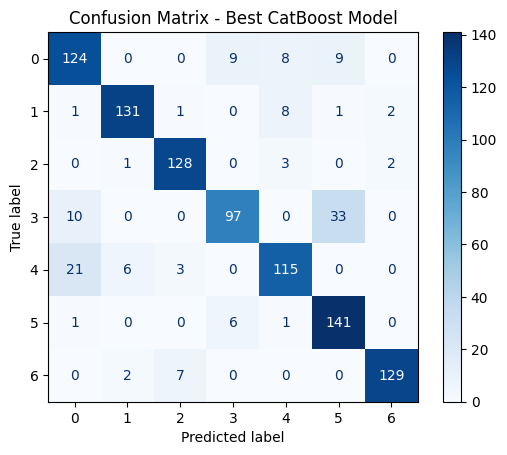

In [88]:
#Confusion Matrix for Catboost
cm = confusion_matrix(y_test_top, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Best CatBoost Model")
plt.show()

# **Deploying the Model**

In [89]:
import joblib
joblib.dump(best_model, 'supervised_model.pkl')

['supervised_model.pkl']